# Principal Component Analysis (PCA) Example
Here is demonstrated how to use the PCA module from the rice_ml library for dimensionality reduction. We use the standardize function from preprocessing to ensure proper scaling.\
In this example, a synthetically generated 3D dataset will be reduced to a 2D subspace for easy visualization.\

**Goal: Reduce the dimensionality of a dataset from 3 features to 2 principal components while retaining the maximum possible variance.**

In [3]:
import numpy as np
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

from rice_ml.unsupervised_learning.pca import PCA
from rice_ml.processing.preprocessing import standardize, train_test_split 


## 1. Load Data and Preprocessing (Standardization)
Generate data in 3 dimensions (n_features=3) which are strongly correlated, making it a good candidate for reduction to 2 dimensions. Standardization is crucial for PCA to work correctly.

In [6]:
# Generate synthetic data in 3D (3 features)
N_CLUSTERS = 3
X_raw, y_true = make_blobs(
    n_samples = 200, 
    n_features = 3, # Start with 3 dimensions
    centers = N_CLUSTERS, 
    cluster_std = 2.0,
    random_state = 67
)

# 1. Standardize the entire dataset (for demonstration purposes here)
# NOTE: In a true pipeline, you would fit on train and transform on test, but for PCA fitting/visualization, we often standardize the full dataset.
X_scaled = standardize(X_raw, return_params=False)

print(f"Original Data Shape: {X_scaled.shape}")

Original Data Shape: (200, 3)


## 2. Initialize and Fit the Model
Initialize PCA, specifying that we want to reduce the data to 2 principal components (`n_components=2`).

In [7]:
# Initialize PCA to retain 2 components
pca = PCA(n_components=2) 

print("\nFitting PCA model...")

# Fit the model to the scaled data. This calculates the mean and components.
pca.fit(X_scaled)

print("PCA Fit Complete.")
print(f"Final number of components selected: {pca.n_components_}")


Fitting PCA model...
PCA Fit Complete.
Final number of components selected: 2


## 3. Transform the Data
Apply the learned transformation to the scaled data to project it onto the new 2D subspace.

In [8]:
# Transform the scaled data
X_reduced = pca.transform(X_scaled)

print(f"\nReduced Data Shape: {X_reduced.shape}")


Reduced Data Shape: (200, 2)


## 4. Analyze Explained Variance
A key output of PCA is the explained variance ratio, which tells us how much information was preserved.

In [9]:
print("\n--- Explained Variance Analysis ---")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Component {i+1}: {ratio:.4f} ({ratio*100:.2f}% of total variance)")

cumulative_variance = np.sum(pca.explained_variance_ratio_)
print(f"\nTotal Variance Retained by 2 Components: {cumulative_variance:.4f} ({cumulative_variance*100:.2f}%)")


--- Explained Variance Analysis ---
Component 1: 0.6150 (61.50% of total variance)
Component 2: 0.3329 (33.29% of total variance)

Total Variance Retained by 2 Components: 0.9479 (94.79%)


## 5. Visualization
Visualize the results by plotting the 3D data (original) and the 2D projected data (reduced).

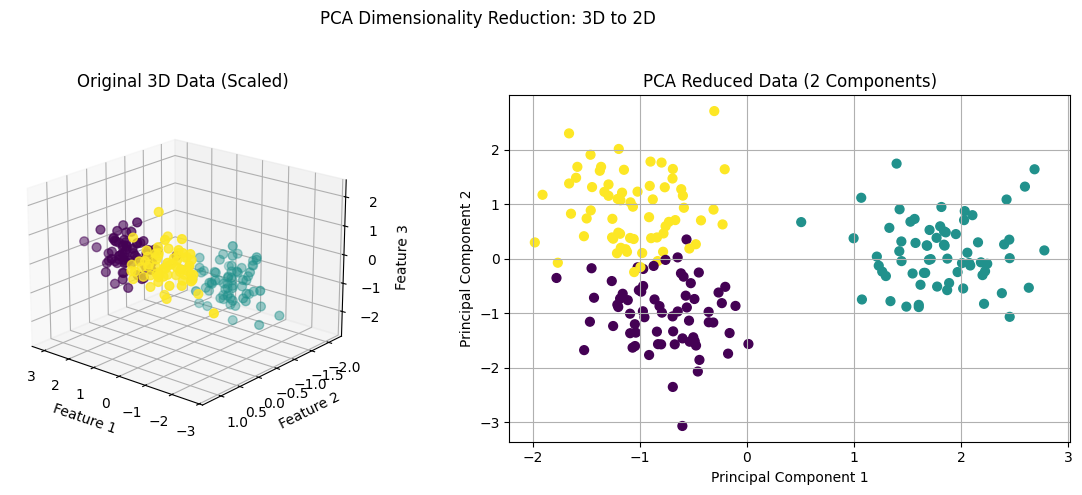

In [10]:
# --- 6.1 Visualize Original 3D Data ---
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], 
                       c=y_true, cmap='viridis', s=40)
ax1.set_title('Original 3D Data (Scaled)')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')
ax1.view_init(elev=20, azim=130) # Set view angle

# --- 6.2 Visualize Reduced 2D Data ---
ax2 = fig.add_subplot(122)
scatter2 = ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], 
                       c=y_true, cmap='viridis', s=40)
ax2.set_title(f'PCA Reduced Data (2 Components)')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.grid(True)

plt.suptitle(f"PCA Dimensionality Reduction: 3D to 2D")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()